# Data - Exploratory Data Analysis

## Install & import libraries

In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (11,5)

COLORS = plt.get_cmap('tab10').colors

## Read data

In [3]:
DATASET_LABEL = 'BIDV'
DATASET_NAME = 'BIDV_2019-01-01_2024-06-01'

In [4]:
stock_data = pd.read_csv(f'processed-data/{DATASET_NAME}.processed-data.csv')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

## Analyze data

In [5]:
# quizz =)))
def check_null(label, data):
    if len(label)%2:
        label = f'{label}='

    line_length = 30
    half_length = int((line_length - len(label)) / 2)
    border = f'{'=' * half_length}'

    print(border, label, border, sep='')
    print(f'Shape: {data.shape}')
    print('-' * line_length)
    print('Null checking')
    print('-' * line_length)
    print(data.isnull().sum())
    print('=' * line_length)

In [6]:
check_null(DATASET_LABEL, stock_data)

=============BIDV=============
Shape: (1414, 6)
------------------------------
Null checking
------------------------------
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414 entries, 0 to 1413
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype                    
---  ------  --------------  -----                    
 0   Date    1414 non-null   datetime64[ns, UTC+07:00]
 1   Open    1414 non-null   float64                  
 2   High    1414 non-null   float64                  
 3   Low     1414 non-null   float64                  
 4   Close   1414 non-null   float64                  
 5   Volume  1414 non-null   float64                  
dtypes: datetime64[ns, UTC+07:00](1), float64(5)
memory usage: 66.4 KB


In [8]:
stock_data.describe()

,Open,High,Low,Close,Volume
count,1414.000000,1414.000000,1414.000000,1414.000000,1.414000e+03
mean,33154.997458,33641.679131,32722.593970,33161.567608,2.194259e+06
std,7297.311814,7386.170091,7201.837585,7276.611978,1.603980e+06
min,21590.111328,22225.113281,20813.996094,21590.111328,1.837970e+05
25%,28151.810547,28504.589844,27834.308594,28151.810547,1.149994e+06
50%,31228.564453,31679.830078,30762.378906,31191.765625,1.764049e+06
75%,38601.472656,39089.539062,38279.793945,38601.472656,2.711978e+06
max,54400.000000,56700.000000,53500.000000,54400.000000,1.846408e+07


## Visualize data

In [9]:
def visualize_data(data):
    plt.plot(data['Date'], data['Close'], color=COLORS[0])


    figname = f'{DATASET_LABEL}'
    plt.title(figname)
    plt.xlabel('Date')
    plt.ylabel('Price')

    plt.legend(['Close'])
    plt.show()

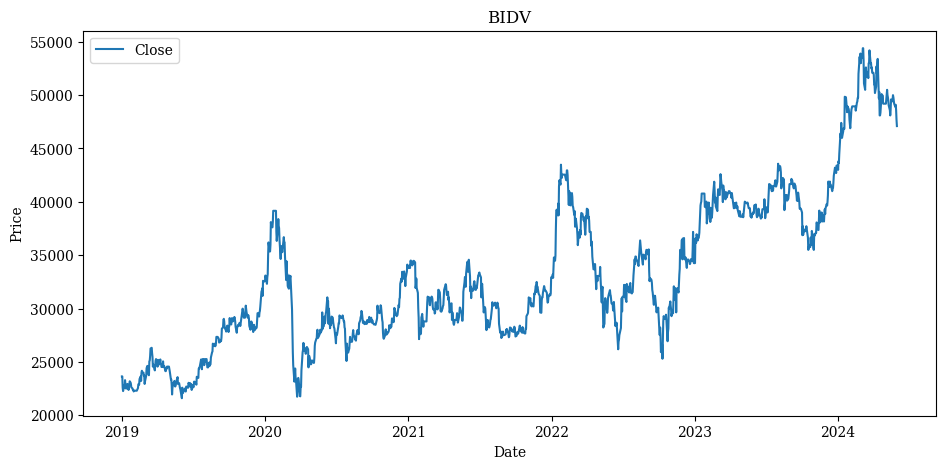

In [10]:
visualize_data(stock_data)


In [11]:
columns = ['High', 'Low', 'Open', 'Close']

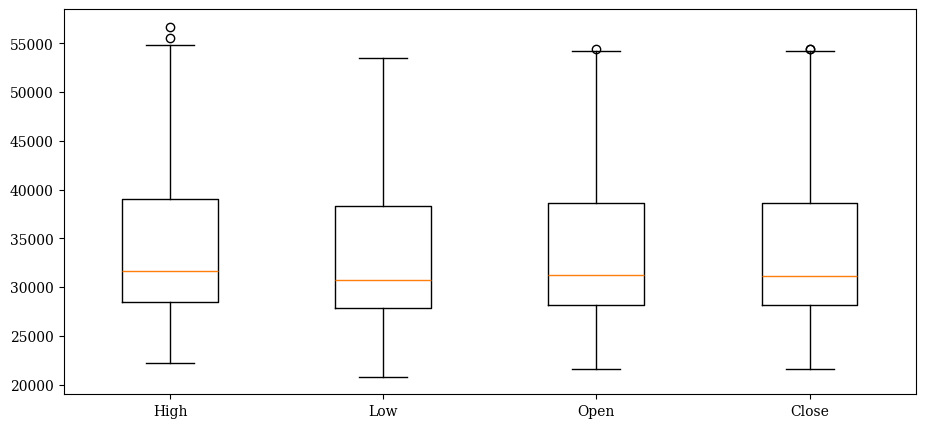

In [12]:
box = stock_data[columns]

plt.boxplot(box)
plt.xticks([1, 2, 3, 4], columns)

plt.show()

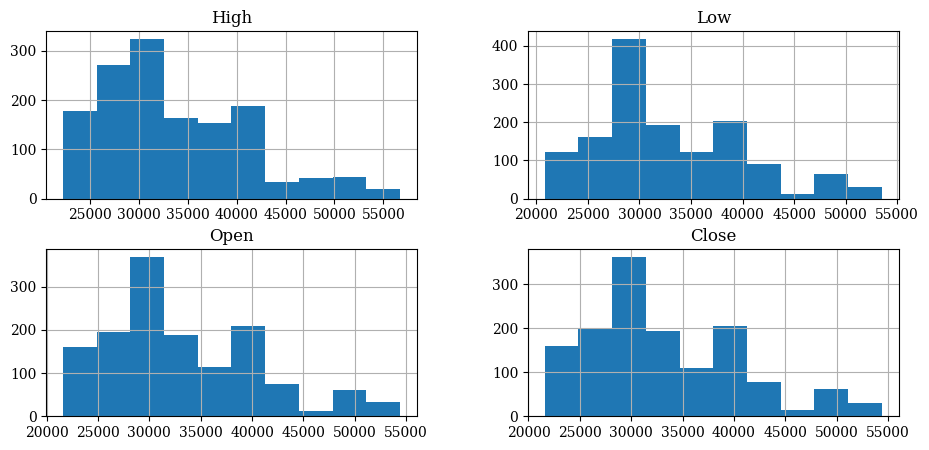

In [13]:
his = stock_data[columns]

his.hist()
plt.show()

## Seasonality

In [14]:
close_prices = stock_data[['Date','Close']]
close_prices.set_index('Date', inplace=True)

In [15]:
import numpy as np
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [16]:
def find_seasonal_period(series):
    default_period = 252
    acf_values = acf(series, nlags=default_period)
    plt.show()
    
    peaks = np.where((acf_values[1:-1] > acf_values[:-2]) & (acf_values[1:-1] > acf_values[2:]))[0]
    
    if len(peaks) > 0:
        return peaks[0] + 1
    else:
        return default_period

In [17]:
period = find_seasonal_period(stock_data['Close'])
print(f"Estimated period: {period}")

Estimated period: 196


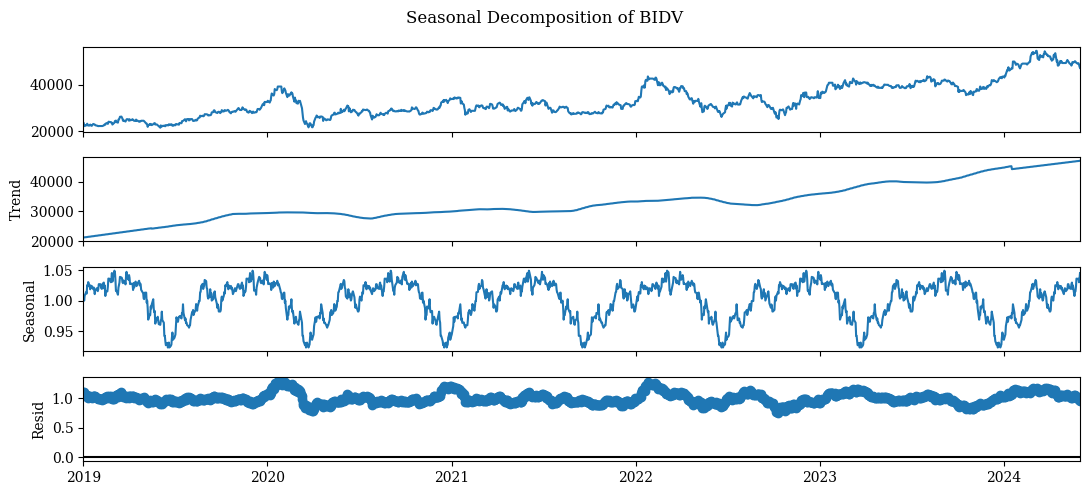

In [18]:
result = seasonal_decompose(close_prices, model='multiplicative', period=period, extrapolate_trend='freq')
result.plot()

plt.suptitle(f'Seasonal Decomposition of {DATASET_LABEL}')
plt.tight_layout()
plt.show()